In [ ]:
##Homework BONUS

In [96]:
#Import dependencies
from sqlalchemy import create_engine, inspect, func
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
import matplotlib.pyplot as plt
import pandas as pd
import sqlalchemy
import psycopg2

In [97]:
# Create connection to enter postgres db
connection = psycopg2.connect('dbname=employee_db user=postgres password=5290 host=localhost')
connection

# engine = create_engine(f"sqlite:///{database_path}")
# data = engine.execute("SELECT * FROM departments)
# database_path = "../EmployeeSQL/departments.csv"
# a = pd.read_csv("EmployeeSQL/departments.csv")


<connection object at 0x00000266229B69D0; dsn: 'user=postgres password=xxx dbname=employee_db host=localhost', closed: 0>

In [98]:
#Activate connection cursor
cur = connection.cursor()

In [99]:
#Select table, make variable and display as dataframe
cur.execute('SELECT dept_no, dept_name FROM "Departments"')
departments = cur.fetchall()
departments_df = pd.DataFrame(departments, columns = ['dept_no','dept_name'])
departments_df


,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development
5,d006,Quality Management
6,d007,Sales
7,d008,Research
8,d009,Customer Service


In [100]:
#Query the employees table
cur.execute('SELECT dept_no, emp_no FROM "Dept_emp"')
dept_emp = cur.fetchall()
dept_emp_df = pd.DataFrame(dept_emp, columns = ['dept_no','emp_no'])
dept_emp_df.head()

,dept_no,emp_no
0,d007,10002
1,d004,10003
2,d004,10004
3,d003,10005
4,d005,10006


In [101]:
#Query the managers
cur.execute('SELECT dept_no, emp_no FROM "Dept_manager"')
dept_manager = cur.fetchall()
dept_manager_df = pd.DataFrame(dept_manager, columns = ['dept_no','emp_no'])
dept_manager_df

,dept_no,emp_no
0,d001,110022
1,d001,110039
2,d002,110085
3,d002,110114
4,d003,110183
5,d003,110228
6,d004,110303
7,d004,110344
8,d004,110386
9,d004,110420


In [102]:
#Query the employee table
cur.execute('SELECT emp_no, title_id, birth_date, first_name, last_name, sex, hire_date FROM "Employees"')
employees = cur.fetchall()
employees_df = pd.DataFrame(employees, columns = ['emp_no', 'title_id', 'birth_date', 'first_name', 'last_name', 'sex', 'hire_date'])
employees_df.head()


,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991


In [103]:
#Query the salaries table
cur.execute('SELECT emp_no, salary FROM "Salaries"')
salaries = cur.fetchall()
salaries_df = pd.DataFrame(salaries, columns = ['emp_no', 'salary'])
salaries_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [110]:
#Query the titles table
cur.execute('SELECT title_id, title FROM "Titles"')
titles = cur.fetchall()
titles_df = pd.DataFrame(title, columns = ['title_id', 'title'])
titles_df

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [106]:
# inspect db
# inspector = inspect(employees_df)
# inspector.get_table_names()

In [113]:
#Join 
#first, join salaries to employees on emp_no
emp_sal = employees_df.merge(salaries_df, on = "emp_no")
emp_sal.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991,53422
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992,48973
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991,40000


In [112]:
#Join the titles table to the newly created db on emp_title_id and␣ title_id
final_db = emp_sal.merge(titles_df, left_on = "title_id", right_on = "title_id")
final_db.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,salary,title
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,40000,Staff
1,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,40000,Staff
2,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991,56087,Staff
3,246449,s0001,3/23/1958,Subbu,Bultermann,F,3/25/1988,87084,Staff
4,48085,s0001,1/19/1964,Venkatesan,Gilg,M,6/28/1993,63016,Staff


In [117]:
#Extract a db of only the titles and salaries
sal_title_db = final_db[['salary','title']]
sal_title_db.head()

,salary,title
0,40000,Staff
1,40000,Staff
2,56087,Staff
3,87084,Staff
4,63016,Staff


In [118]:
#groupby and mean() for the salaries
#edited to round() to zero digits
sal_title_db.groupby('title')['salary'].mean().round(0)

title
Assistant Engineer    48564.0
Engineer              48535.0
Manager               51531.0
Senior Engineer       48507.0
Senior Staff          58550.0
Staff                 58465.0
Technique Leader      48583.0
Name: salary, dtype: float64

Text(0.5, 1.0, 'Salary Average Distribution')

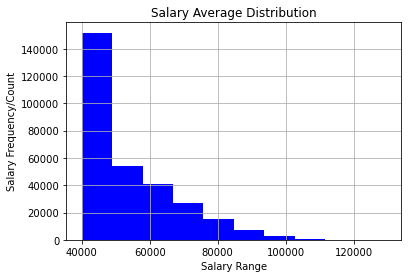

In [120]:
#now we can graph these salaries
sal_title_db.hist(column='salary',color = 'blue')
plt.xlabel('Salary Range')
plt.ylabel('Salary Frequency/Count')
plt.title('Salary Average Distribution')